+ Перд история

Итак, банк обращается к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов. Иными словами, нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

+ Тех задание

→ В файле должно содержаться 10 графиков — 10 ответов к заданиям.

→ Каждый график и преобразования к нему выполняются в отдельной ячейке.

→ Под графиком вы должны предоставить свой ответ на вопрос по нему и, если это требуется, выводы, которые вы можете сделать, исходя из графика.

Продгружаем библиотеки и фаил

In [1]:
import pandas as pd

import plotly
import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt

from plotly.subplots import make_subplots

churn_data = pd.read_csv('../data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Сбор данных о файле

In [2]:
churn_data.shape # рзмерность (10000, 14)
# churn_data.info()
# dtypes: float64(2), int64(9)Age[70] Tenure[11 max10] HasCrCard[1=7055]
# object(3)Surname[2932] Geography[3] Gender[2]
# print('уникум:',churn_data['Tenure'].nunique())
# print('Coun:',churn_data['Geography'].value_counts())
# display('            Номер     ID клиента     Рейтинг     Возраст  Сколько в банке     Баланс       Кол услуг      Карта         Активный            ЗП    Лояльность')
display(churn_data.describe())

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


* RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
* CustomerId — идентификатор клиента
* Surname — фамилия клиента
* CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
* Geography — страна клиента (банк международный)
* Gender — пол клиента
* Age — возраст клиента
* Tenure — сколько лет клиент пользуется услугами банка
* Balance — баланс на счетах клиента в банке
* NumOfProducts — количество услуг банка, которые приобрёл клиент
* HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
* IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
* EstimatedSalary — предполагаемая заработная плата клиента
* Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

ЗАДАНИЯ

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [3]:
# Группируем клиентов по лояльности и считаем их количества
grouped_churn = churn_data.groupby('Exited')['Exited'].count()
grouped_churn.index=['Лояльный клиент','Ушедший клиент']
# Таблица на 2 графика
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]])
# Бар
fig.add_bar(
    y=grouped_churn,
    x=grouped_churn.index,
    row=1, col=1,
    # marker=dict(color=grouped_churn.index)    
    marker_color = ('blue','red')
    ).update_layout( 
    title={"text": "Количество ушедших и лояльных клиентов", "x": 0.5},
    yaxis_title="Число клиентов",xaxis_title='Лояльность клиентов'
)
# Круг
fig.add_pie(
    values=grouped_churn,
    labels=grouped_churn.index,
    row=1, col=2,
    textinfo='percent+label',
    title='Cоотношение ушедших и лояльных клиентов', #заголовок
     )
fig.show()

Из графика видно что ушло 20.4% клиентов от общего числа.

На круговой диаграмме наглядно видно соотношение клиентов, а на столбчатой видно количественную разницу.

+ ЗАДАНИЯ

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [4]:
churn_temp=churn_data.copy()
# фильтр и именуем данные
churn_temp['Exited']=churn_temp['Exited'].astype('category')
churn_temp['Exited']=churn_temp['Exited'].cat.rename_categories({1:'Ушедшие', 0: 'Лояльные'})
churn_filtr=churn_temp[churn_temp['Balance']>2500]

# Гистограмма
fig = px.histogram(
    churn_filtr,
    x='Balance',
    color='Exited',
    marginal='box'
).update_layout( 
 title={"text": "Соотношение клиентов и накоплений", "x": 0.5}, 
 yaxis_title="Количество клиентов",xaxis_title='Баланс клиентов'
)
fig.show()

Из графика мы можем сделать вывод, что основное количество пользователей имеют накопления от 100 000 до 139 000 долларов, а также в этом диапазоне произошел основной отток клиентов. 

+ ЗАДАНИЯ

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [5]:
churn_temp=churn_data.copy()
# Именуем данные
churn_temp['Exited']=churn_temp['Exited'].astype('category')
churn_temp['Exited']=churn_temp['Exited'].cat.rename_categories({1:'Ушедшие', 0: 'Лояльные'})

# Гистограмма
fig=px.histogram(
    churn_temp,
    x='Balance',
    #y='Exited',
    color='Exited'
).update_layout( 
 title={"text": "Соотношение баланса клиентов и числености клиентов", "x": 0.5},
 yaxis_title="Количество клиентов",xaxis_title='Баланс клиентов'
)
fig.show()

Отток клиентов происходит по причине: смерть, перeезд, неудовлетворенность банком, но из графика мы видим, что клиенты ушли, накопив достаточное количество денежных средств,также из графика видно что большой отток клиентов с нулевым балансом это означает что на счету не было денежных срадств и счет закрылся за ненадобностью.

+ ЗАДАНИЯ

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [6]:
churn_temp=churn_data.copy()
# Именуем данные
churn_temp['Exited']=churn_temp['Exited'].astype('category')
churn_temp['Exited']=churn_temp['Exited'].cat.rename_categories({1:'Ушедшие', 0: 'Лояльные'})

# Коробочный
fig = px.box(
    churn_temp,
    x='Age',
    y='Exited',
    color='Exited',    
).update_layout( 
 title={"text": "Распределения возраста и лояльность клиентов", "x": 0.5},
 yaxis_title="Лояльность клиентов",xaxis_title='Возраст клиентов'
)
fig.show()

У лояльных клиентов больше потенциальных выбросов. Нужно обратить внимание на возрастную группу от 38 до 51 года.

+ ЗАДАНИЯ

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [7]:
churn_temp=churn_data.copy()
# Именуем данные
churn_temp['Exited']=churn_temp['Exited'].astype('category')
churn_temp['Exited']=churn_temp['Exited'].cat.rename_categories({1:'Ушедшие', 0: 'Лояльные'})
# Группируем клиентов по балансу на счете, рейтингу и лояльности
churn_grup=churn_temp.groupby(['CreditScore','Exited'], as_index=False)['EstimatedSalary'].mean()

# График рассеивания
fig=px.scatter(
    data_frame=churn_grup,
    x='CreditScore',
    y='EstimatedSalary',
    color='Exited'    
).update_layout( 
 title={"text": "График рассеивания клиентов в зависимости рейтинга и предполагаемой зарплаты",
        "x": 0.5}, yaxis_title="Предполагаемоя зарплата клиентов",xaxis_title='Рейтинг клиентов'
)
fig.show()

На графике прямой зависимости не прослеживается, но мы видим что рейтинг до 400 имеют ушедшие клиенты.

+ ЗАДАНИЯ

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [8]:


churn_temp=churn_data.copy()
# Группируем ушедших клиентов по половому признаку в % 
grouped_churn=churn_temp.groupby(['Gender'])['Exited'].mean().round(2)*100

# Бар
fig=px.bar(  
    x=grouped_churn.index ,
    y=grouped_churn,
    color=grouped_churn.index,    
    ).update_layout( 
 title={"text": "Процентное соотношение ушедших клиентов кождой группы", "x": 0.5},
 yaxis_title="%",xaxis_title='клиенты'
)
fig.show()

На графике мы видим что клиентов из группы Female покинуло 25%, из группы Male покинуло 16%.
Делаем вывод что: Женщин уходит больше.


+ ЗАДАНИЯ

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [9]:
churn_temp=churn_data.copy()
# Именуем данные
churn_temp['Exited']=churn_temp['Exited'].astype('category')
churn_temp['NumOfProducts']=churn_temp['NumOfProducts'].astype(str)
churn_temp['Exited']=churn_temp['Exited'].cat.rename_categories({1:'Ушедшие', 0: 'Лояльные'})
# Группируем клиентов по количеству услуг
churn_grup=churn_temp.groupby(['NumOfProducts','Exited'], as_index=False)['NumOfProducts'].value_counts()

# Бар
fig=px.bar(
    churn_grup,
    x='NumOfProducts',
    y='count',
    color='Exited',  
).update_layout( 
 title={"text": "Соотношения количества услуг и клиентов получивших услуги", "x": 0.5},
 yaxis_title="Количество клиентов",xaxis_title='Количество услуг'
 )
fig.show()


Если рассматривать в разрезе ушедших клиентов можно сказать что чем больше услуг получено тем меньше клиентов ушло.
Если рассматривать в разрезе лояльных клиентов они пользуются от 1 услуги до 2, 4 услугами не кто не пользовался, а 3 услугами воспользовались всего 46 клиентов хотя из ушедших 3 услугами воспользовались 220 клиентов. 
Что-то отпугивает клиентов?

+ ЗАДАНИЯ

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [10]:
churn_temp=churn_data.copy()
# Именуем данные
churn_temp['Exited']=churn_temp['Exited'].astype('category')
churn_temp['IsActiveMember']=churn_temp['IsActiveMember'].astype('category')
churn_temp['Exited']=churn_temp['Exited'].cat.rename_categories({1:'Ушедшие', 0: 'Лояльные'})
churn_temp['IsActiveMember']=churn_temp['IsActiveMember'].cat.rename_categories({1:'Активный', 0: 'Пассивный'})
# Группируем клиентов по активности
churn_grup=churn_temp.groupby(['IsActiveMember','Exited'], as_index=False)['IsActiveMember'].value_counts()

# Бар
fig=px.bar(
    churn_grup,
    x='IsActiveMember',
    y='count',
    color='Exited',  
).update_layout( 
 title={"text": "Количества активных и пассивных клиентов", "x": 0.5},
 yaxis_title="Количество клиентов",xaxis_title='Тип клиента'
 )
fig.show()


Из группы 'активных клиентов' уходит в 2 раза меньше клиентов.
Необходимо развивать новые сервисы так, чтобы все клиенты были заинтересованы в том, чтобы оставаться и приводить новых клиентов.

+ ЗАДАНИЯ

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [11]:
churn_temp=churn_data.copy()
# группируем по странам ушедших клиентов в %
churn_countryes = churn_temp.groupby(['Geography'])[['Exited']].mean()*100

col_m=churn_countryes['Exited'].max() # находим максимальную цвета

# строим график
fig = px.choropleth(
    data_frame=churn_countryes, #датафрейм
    locations=churn_countryes.index, #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой plotly
    color='Exited', #от чего зависит цвет
    range_color=[0, col_m],
    title='Расположение ушедших клиентов', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Viridis' #палитра цветов
)
#отображаем его
fig.show()

В 'Germany' количество ушедших клиентов выше. Это может быть связано с географическим положением страны или банка.

+ ЗАДАНИЯ

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

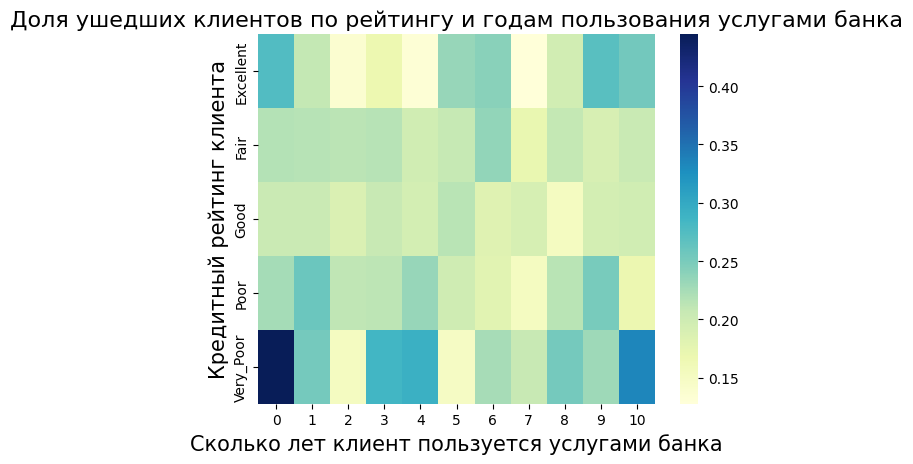

In [15]:
# Функция присвоения имени рейтингу клиентов
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"



churn_temp=churn_data.copy()

# Именуем
churn_temp['CreditScore']=churn_temp['CreditScore'].apply(get_credit_score_cat)
churn_temp['CreditScore']=churn_temp['CreditScore'].astype('category')

# Сводная таблица оттока клиентов с рейтингом клиента количество лет в банке
temp2=churn_temp.pivot_table(
    values='Exited',   # Значения с которыми производим операции
    index='CreditScore',    # название строк и группировка по значению
    columns='Tenure',   # название столбцов и группировка по значению
    aggfunc='mean'      # функция по умолчанию mean()
    )

heatmap = sns.heatmap(data=temp2, cmap='YlGnBu')
plt.ylabel('Кредитный рейтинг клиента', fontsize = 15)
plt.xlabel('Сколько лет клиент пользуется услугами банка', fontsize = 15)
heatmap.set_title('Доля ушедших клиентов по рейтингу и годам пользования услугами банка', fontsize=16);

Чаще всего уходят клиенты с рейтингом "Very_Poor", которые пользуются услугами банка в течение 0 лет.

In [13]:
# CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
# Geography — страна клиента (банк международный)
# Gender — пол клиента
# Age — возраст клиента
# Tenure — сколько лет клиент пользуется услугами банка
# Balance — баланс на счетах клиента в банке
# NumOfProducts — количество услуг банка, которые приобрёл клиент
# HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
# IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
# EstimatedSalary — предполагаемая заработная плата клиента
# Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)